In [5]:
#IMPORTING LIBRARIES & FUNCTIONS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

from sklearn.datasets import fetch_california_housing

In [6]:
#IMPORTING CALIFORNIA HOUSE PRICE DATASET
house_price_dataset= fetch_california_housing()

print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [11]:
#LOADING THE DATASET TO A PANDAS DATAFRAME

house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns= house_price_dataset.feature_names)

In [12]:
#DISPLAY FIRST 5 ROWS

house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [16]:
#DISPLAY NUMBER OF ROWS AND COLUMNS
house_price_dataframe.shape

(20640, 8)

In [17]:
#DISPLAY STATISTICAL VALUES OF THE DATASET
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [18]:
#ADD THE TARGET ARRAY IE THE PRICE ARRAY IN THE DATAFRAME FOR THE PREDICTION

house_price_dataframe['Price'] = house_price_dataset.target

In [19]:
#DISPLAY FIRST 5 ROWS AGAIN

house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
#DISPLAY NUMBER OF ROWS AND COLUMNS AGAIN
house_price_dataframe.shape

(20640, 9)

In [21]:
#CHECK FOR MISSING VALUES

house_price_dataframe.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [25]:
#UNDERSTANDING THE CORRELATION BETWEEN THE FEATURES OF THE DATAFRAME
#1. POSITIVE CORRELATION (IF ONE FEATURE INCREASES, ANOTHER ALSO INCREASES)
#2. NEGATIVE CORRELATION(IF ONE FRATURE INCREASES, ANOTHER DECREASES)

correlation= house_price_dataframe.corr()

<Axes: >

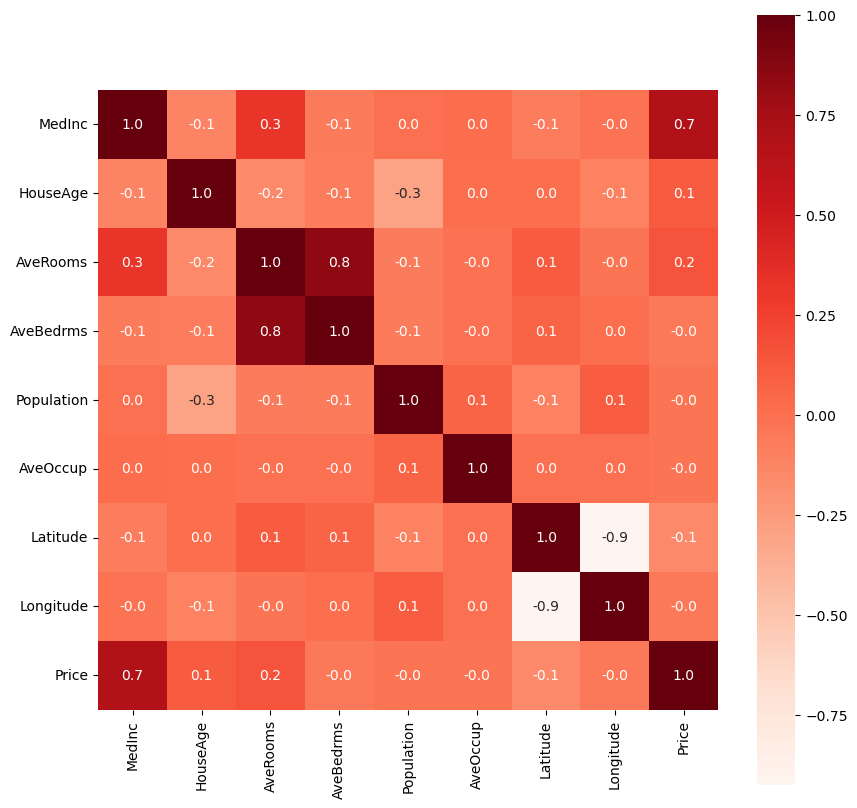

In [32]:
#CONSTRUCT A HEATMAP TO UNDERSTAND CORRELATION

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Reds')

#cbar= color bar
#square= true means we want values in squares
#fmt= float value 1f= o.1
#annotations= the numbers inside squares
#annot size= font size on numbers inside square


In [33]:
#SPLITTING DATA INTO DATA AND LABELS

X= house_price_dataframe.drop(['Price'], axis=1)
Y= house_price_dataframe['Price']

In [34]:
print(X)
print(Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

In [35]:
#SPLITTING DATA INTO TRAIN & TEST DATA

Xtrain, Xtest, Ytrain, Ytest= train_test_split(X,Y, test_size=0.2, random_state= 2)

In [36]:
print(X.shape, Xtrain.shape, Xtest.shape)

(20640, 8) (16512, 8) (4128, 8)


In [37]:
#TRAINING THE MODEL using XGBOOST REGRESSOR ALGORITHM
#loading the model

model= XGBRegressor()

#training the model
model.fit(Xtrain, Ytrain)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
#Evaluating the performance of the model

#accuracy for prediction on training data

training_data_prediction= model.predict(Xtrain)

In [39]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [43]:
#USING R SQUARED ERROR

score1= metrics.r2_score(Ytrain, training_data_prediction)

#Using Mean Absolute Error
score2= metrics.mean_absolute_error(Ytrain, training_data_prediction)

print("R Squared Error is:", score1)
print("Mean Absolute Error is:", score2)

R Squared Error is: 0.943650140819218
Mean Absolute Error is: 0.1933648700612105


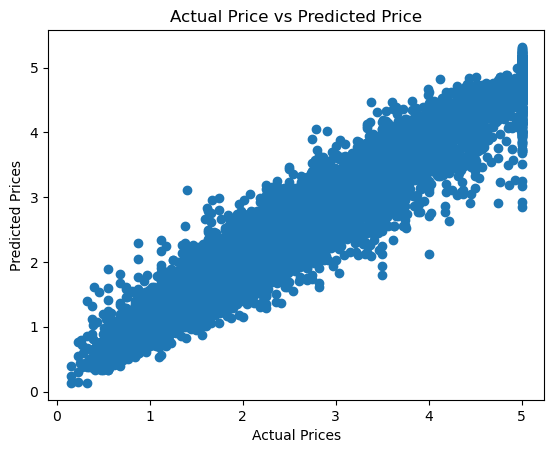

In [44]:
plt.scatter(Ytrain, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [41]:
#accuracy for prediction on testing data

testing_data_prediction= model.predict(Xtest)

In [42]:
#USING R SQUARED ERROR

score1= metrics.r2_score(Ytest, testing_data_prediction)

#Using Mean Absolute Error
score2= metrics.mean_absolute_error(Ytest, testing_data_prediction)

print("R Squared Error is:", score1)
print("Mean Absolute Error is:", score2)

R Squared Error is: 0.8338000331788725
Mean Absolute Error is: 0.3108631800268186
